In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [49]:
# Load the dataset

data = pd.read_csv(r'C:\Users\sarth\Documents\titanic.CSV.csv')




Accuracy Score: 0.8212290502793296
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[92 13]
 [19 55]]


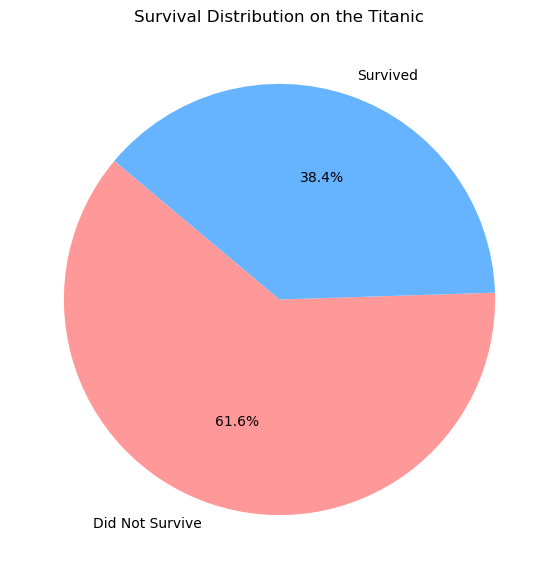

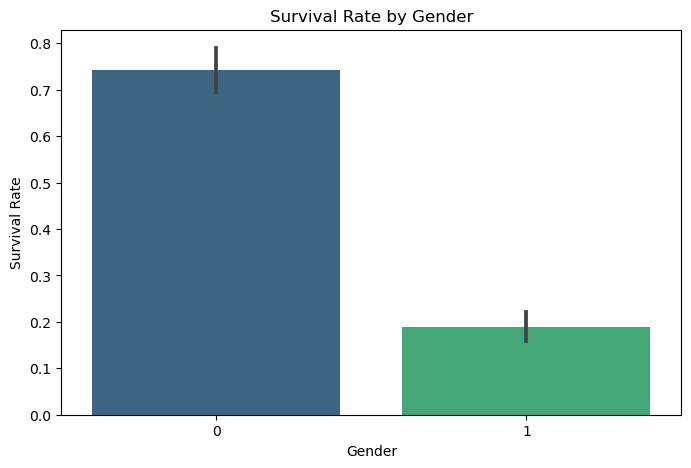

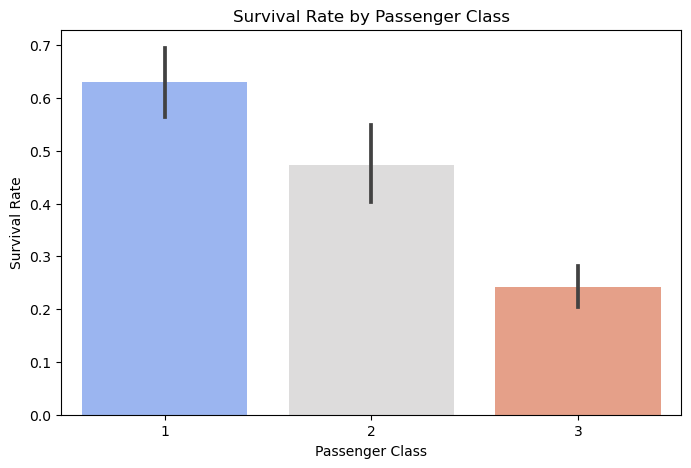

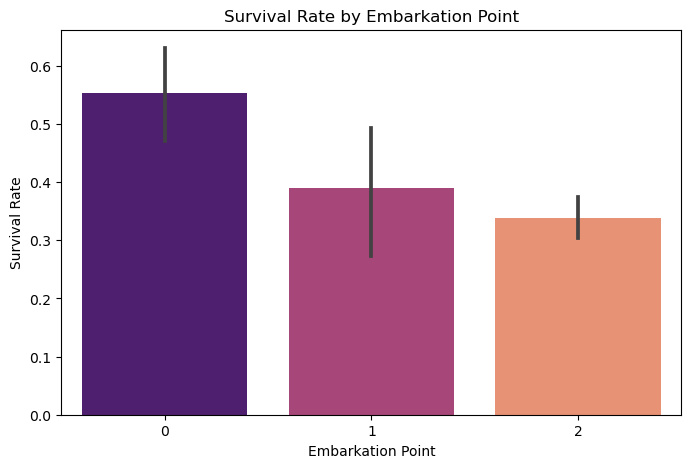

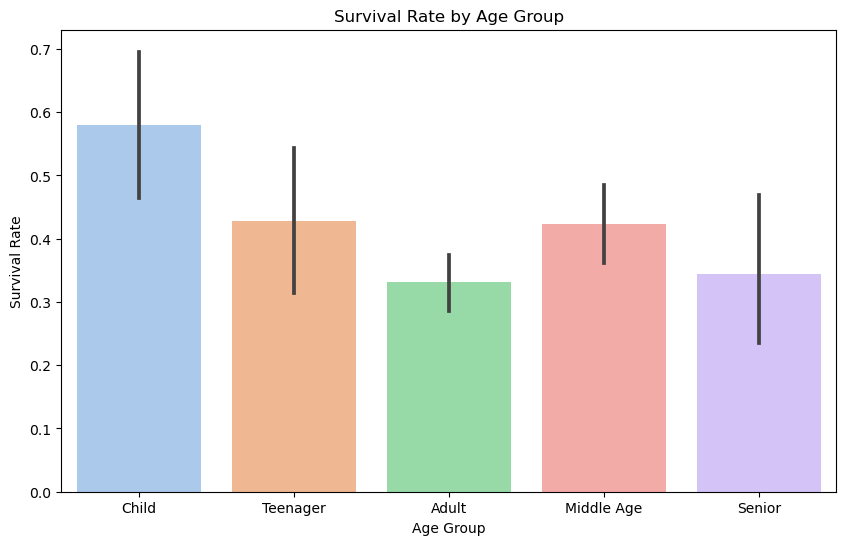

C:\Users\sarth\AppData\Local\Temp\ipykernel_26476\2174273804.py:89: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


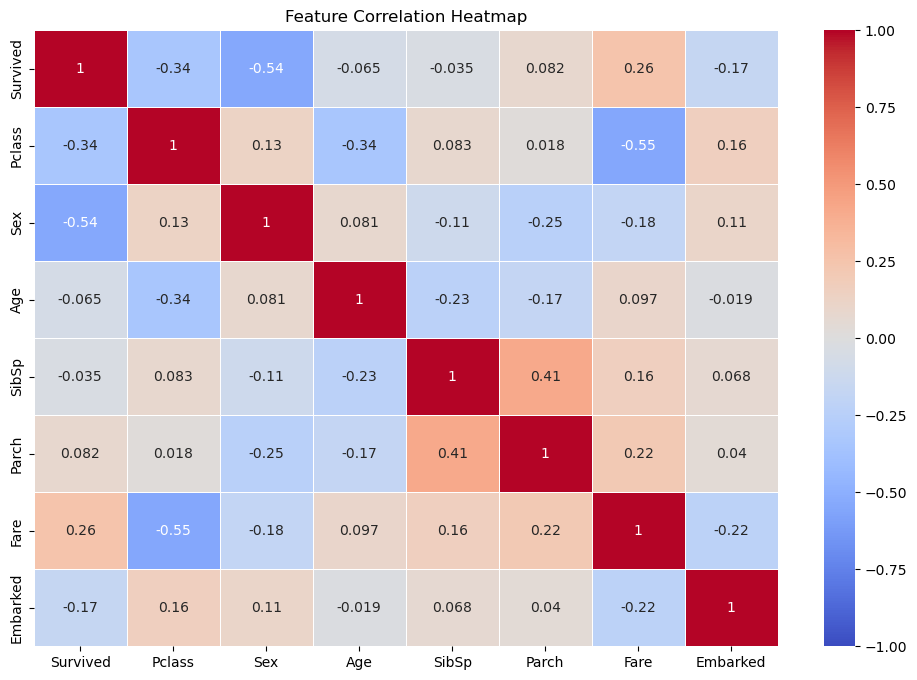

<Figure size 700x700 with 0 Axes>

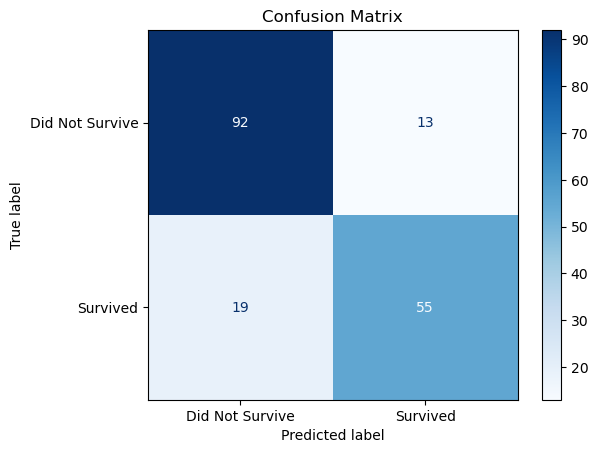

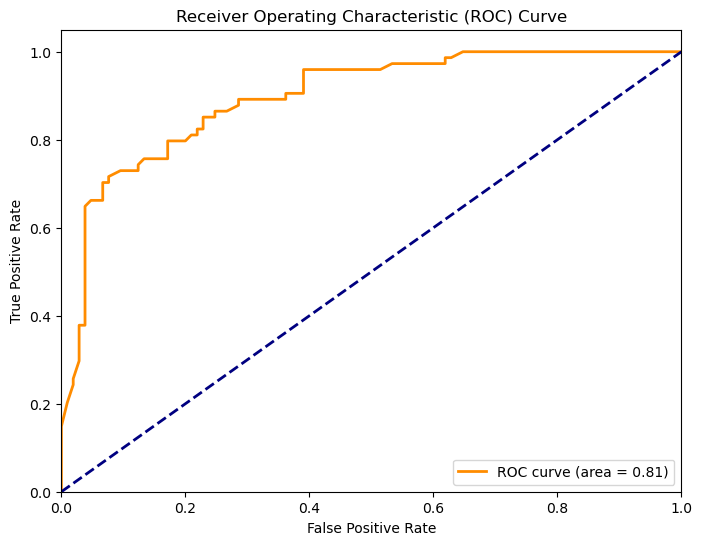

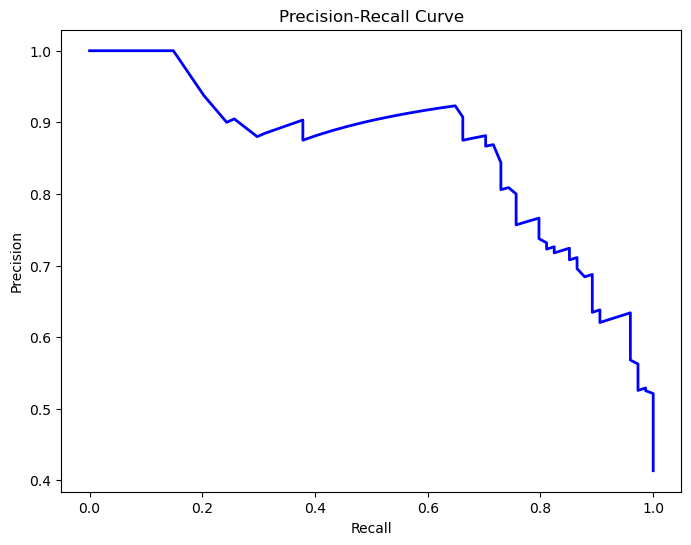

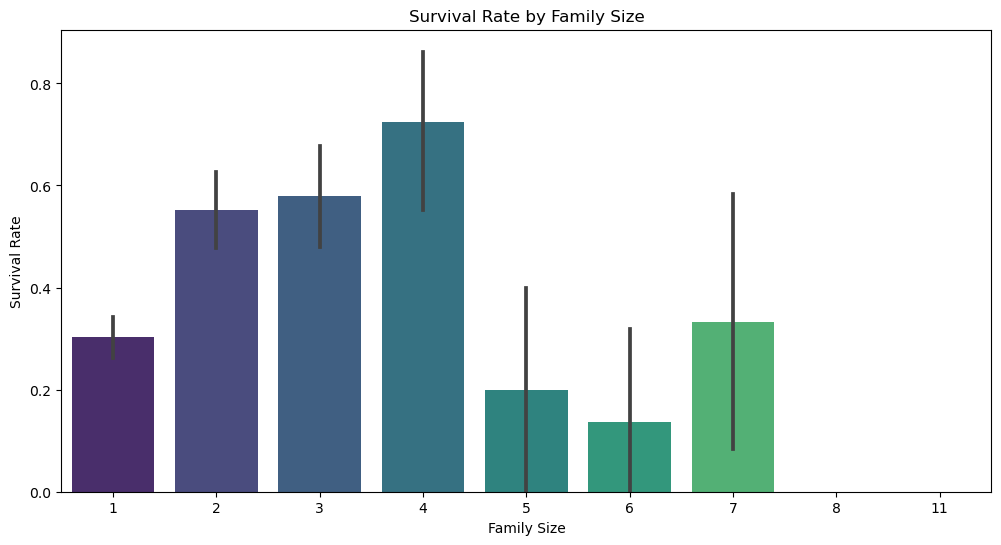

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve

# Load the dataset
data = pd.read_csv(r'C:\Users\sarth\Documents\titanic.CSV.csv')

# Drop columns that are not useful for prediction
data = data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Feature and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Plotting various graphs

# 1. Class Distribution Pie Chart
plt.figure(figsize=(7, 7))
survival_counts = data['Survived'].value_counts()
plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Survival Distribution on the Titanic')
plt.show()

# 2. Survival Rate by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

# 3. Survival Rate by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data, palette='coolwarm')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

# 4. Survival Rate by Embarked
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=data, palette='magma')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarkation Point')
plt.show()

# 5. Survival Rate by Age Group
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=data, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

# 6. Feature Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 7. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# 8. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 9. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 10. Survival Rate by Family Size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
plt.figure(figsize=(12, 6))
sns.barplot(x='FamilySize', y='Survived', data=data, palette='viridis')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()


In [51]:
import pandas as pd
data = pd.read_csv(r'C:\Users\sarth\Documents\titanic.CSV.csv')
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [53]:
import os

file_path = os.path.join('C:', 'Users', 'sarth', 'Documents', 'titanic.CSV.csv')
data = pd.read_csv(r'C:\Users\sarth\Documents\titanic.CSV.csv')

